# Understanding Descriptive Statistics

Import the necessary libraries here:

In [761]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choices

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [762]:
def roll_dice():
    # Define the possible outcomes of rolling a dice
    outcomes = [1, 2, 3, 4, 5, 6]
    
    # Simulate rolling the dice 10 times
    rolls = choices(outcomes, k=10)
    
    # Create a dataframe to store the rolls
    df = pd.DataFrame({'Roll': rolls})
    
    return df

# Call the function to simulate rolling a dice
dice_rolls = roll_dice()
dice_rolls

,Roll
0,2
1,3
2,6
3,6
4,2
5,4
6,1
7,3
8,4
9,1


#### 2.- Plot the results sorted by value.

array([[<Axes: title={'center': 'Roll'}>]], dtype=object)

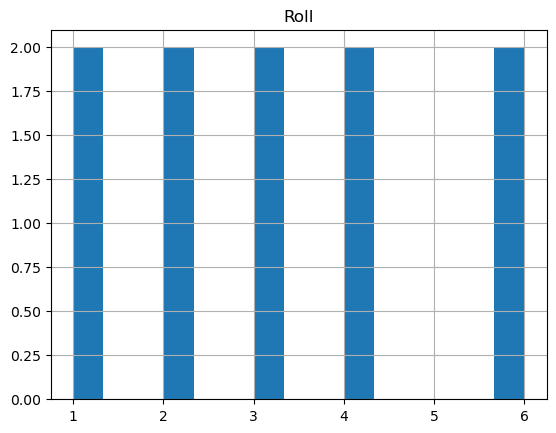

In [763]:
#plt.hist(dice_rolls.sort_values(['Roll']))
dice_rolls.sort_values(['Roll']).hist(bins = 15)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<Axes: ylabel='Count'>

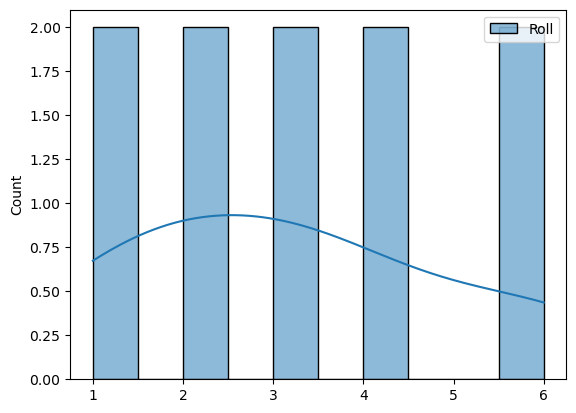

In [764]:
sns.histplot(data=dice_rolls, kde = True,bins = 10, color = 'skyblue')

In [765]:
"""
In second one we are analazing the frequency in a area = 1.
"""

'\nIn second one we are analazing the frequency in a area = 1.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [766]:
def mean(df):
    mean = df.sum() / len(df)
    return mean

mean(dice_rolls)

Roll    3.2
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [767]:
def calculate_mean(df):
    freq_dist = df['Roll'].value_counts().sort_index()
    
    total_sum = 0
    num_items = 0

    for value, frequency in freq_dist.items():
        total_sum += value * frequency
        num_items += frequency

    mean_value = total_sum / num_items
    
    return mean_value

calculate_mean(dice_rolls)

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [768]:
def calculate_median(data):
    """
    Calculates the median of a list of numbers without using built-in median functions.
    """
    sorted_data = sorted(data['Roll'])
    n = len(sorted_data)
    if n % 2 == 0:
        # If there are an even number of observations, take the average of the middle two
        median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
    else:
        # If there are an odd number of observations, take the middle value
        median = sorted_data[n // 2]

    return median

calculate_median(dice_rolls)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [769]:
def quartiles(rolled):
    a = rolled.sort_values(['Roll'])
    hola = a.reset_index()['Roll']
    hey = hola.to_frame()
    length = len(hey)

    a = int(len(rolled)/4)
    b = int((len(rolled)/4)-1)
    q1 = (hey['Roll'][a]+hey['Roll'][b])/2

    q2 = calculate_median(rolled)
    
    c = int((len(rolled)/4)*3)
    d = int(((len(rolled)/4)*3)+1)
    q3 = (hey['Roll'][c]+hey['Roll'][d])/2

    return q1, q2, q3

quartiles(dice_rolls)
    

(1.5, 3.0, 5.0)

In [770]:
q1 = np.percentile(dice_rolls, 25)
q2 = np.percentile(dice_rolls, 50)
q3 = np.percentile(dice_rolls, 75)

q3

4.0

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

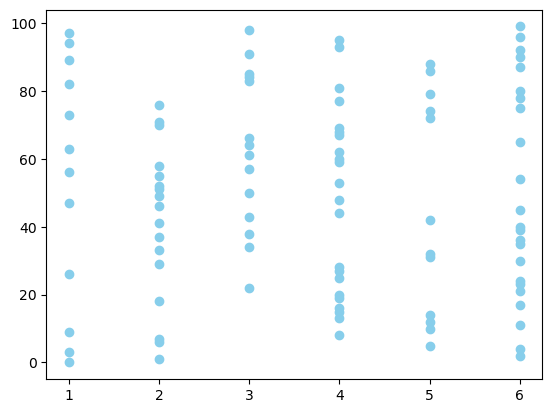

In [771]:
df = pd.read_csv('roll_the_dice_hundred.csv')
values = df[['roll', 'value']]
# roll = values.groupby('value').count()
plt.scatter(x=values['value'],y = values['roll'],color = 'skyblue')

In [772]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [773]:
mean(values)

roll     49.50
value     3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [774]:
frequency_distribution = values['value'].value_counts().sort_values().reset_index()
frequency_distribution

,index,value
0,1,12
1,5,12
2,3,14
3,2,17
4,4,22
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<Axes: xlabel='value', ylabel='Count'>

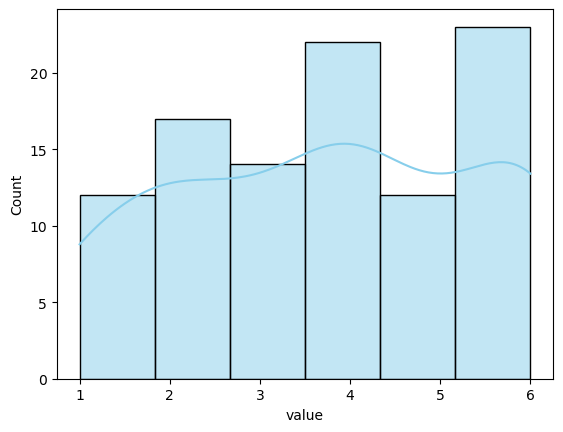

In [775]:
sns.histplot(data=values, x= 'value',kde = True,bins = 6, color = 'skyblue')

In [776]:
"""
The mean it is aprox in the middle of the histplot

"""

'\nThe mean it is aprox in the middle of the histplot\n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<Axes: xlabel='value', ylabel='Count'>

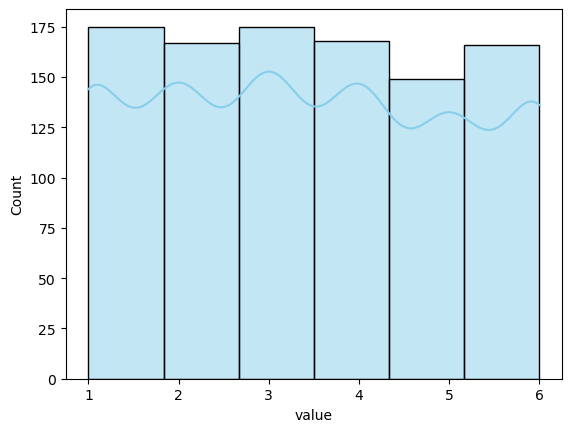

In [777]:
df = pd.read_csv('roll_the_dice_thousand.csv')
values = df[['roll', 'value']]
sns.histplot(data=values, x= 'value',kde = True,bins = 6, color = 'skyblue')

In [778]:
"""
It is a uniform distibution, the more you roll the dice the more colser you are to an uniform distr.
"""

'\nIt is a uniform distibution, the more you roll the dice the more colser you are to an uniform distr.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

       observation
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000


<Axes: xlabel='observation', ylabel='Count'>

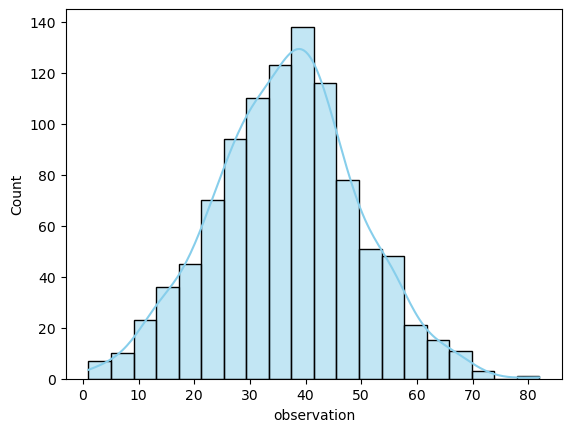

In [779]:
df = pd.read_csv('ages_population.csv')
print(df.describe())
sns.histplot(data=df, x= 'observation',kde = True,bins = 20, color = 'skyblue')


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [780]:
df.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [781]:
"""
Yes!!!!!!!!!!!!!
"""

'\nYes!!!!!!!!!!!!!\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

       observation
count  1000.000000
mean     27.155000
std       2.969814
min      19.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000


<Axes: xlabel='observation', ylabel='Count'>

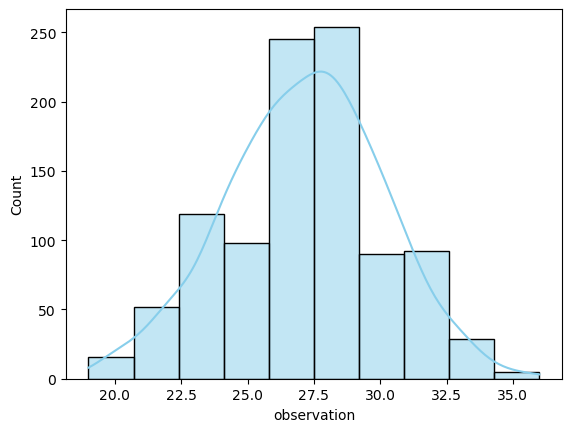

In [782]:
df2 = pd.read_csv('ages_population2.csv')
print(df2.describe())
sns.histplot(data=df2, x= 'observation',kde = True,bins = 10, color = 'skyblue')


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [783]:
"""
The population is much younger.
Tenir en compte que la std es mes petita pqe tenim menys range.
"""

'\nThe population is much younger.\nTenir en compte que la std es mes petita pqe tenim menys range.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [784]:
df2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

       observation
count  1000.000000
mean     41.989000
std      16.144706
min       1.000000
25%      30.000000
50%      40.000000
75%      53.000000
max      77.000000


<Axes: xlabel='observation', ylabel='Count'>

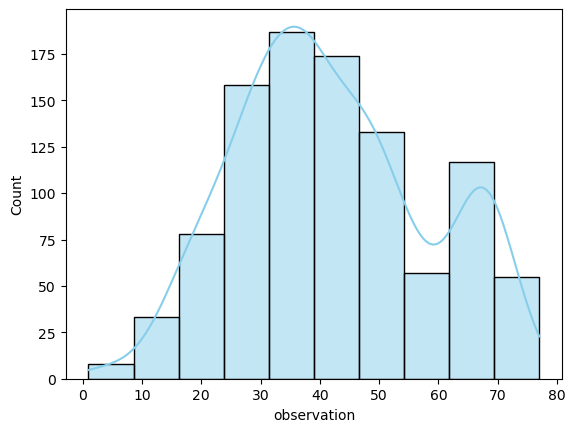

In [785]:
df3 = pd.read_csv('ages_population3.csv')
print(df3.describe())
sns.histplot(data=df3, x= 'observation',kde = True,bins = 10, color = 'skyblue')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [786]:
df3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [787]:
"""
Los datos estan mas dipersos, por lo tanto hay mas std
"""

'\nLos datos estan mas dipersos, por lo tanto hay mas std\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [788]:
df3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [789]:
"""

The difference between the median and the mean is bigger.
We know that in a normal distribution the mean shoud be equal to the mean.
We could doubt that this data follows a perfect normal distribution.

"""

'\n\nThe difference between the median and the mean is bigger.\nWe know that in a normal distribution the mean shoud be equal to the mean.\nWe could doubt that this data follows a perfect normal distribution.\n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [808]:
desc1 = df.describe() 
desc2 = df2.describe()
desc3 = df3.describe()

joined_df = desc1.add_suffix('_1').join([desc2.add_suffix('_2'), desc3.add_suffix('_3')])
joined_df

,observation_1,observation_2,observation_3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [791]:
"""
your comments here
"""

'\nyour comments here\n'